In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute
from qiskit_textbook.tools import array_to_latex
from math import pi
import numpy as np

In [2]:
##### build your quantum circuit here
q = QuantumRegister(4, 'q')
c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(q, c)
# qc.x(0)
# qc.x(2)

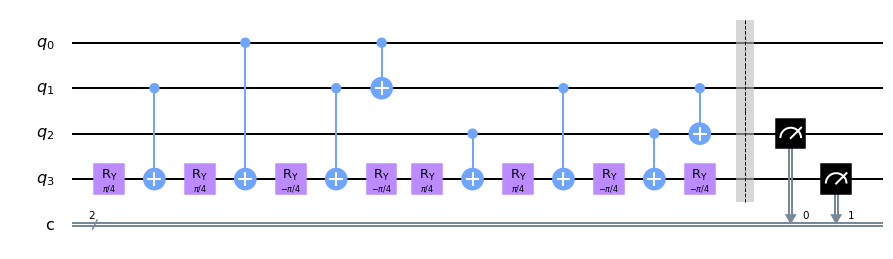

In [3]:
def toffoli(qc, first, second, target):
    qc.ry(pi/4, target)
    qc.cx(second, target)
    qc.ry(pi/4, target)
    qc.cx(first, target)
    qc.ry(-pi/4, target)
    qc.cx(second, target)
    qc.ry(-pi/4, target)
toffoli(qc, 0, 1, 3)
qc.cx(0,1)
toffoli(qc, 1, 2, 3)
qc.cx(1,2)
qc.barrier()
qc.measure(q[2],c[0])
qc.measure(q[3],c[1])
qc.draw('mpl')

Found 8 out of 8
{'10': 1024}


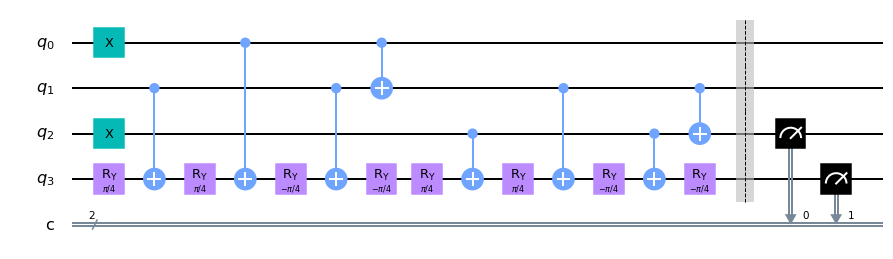

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute
from qiskit_textbook.tools import array_to_latex
from math import pi
import numpy as np
##### build your quantum circuit here
q = QuantumRegister(4, 'q')
c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(q, c)
def toffoli(qc, first, second, target):
    qc.ry(pi/4, target)
    qc.cx(second, target)
    qc.ry(pi/4, target)
    qc.cx(first, target)
    qc.ry(-pi/4, target)
    qc.cx(second, target)
    qc.ry(-pi/4, target)
toffoli(qc, 0, 1, 3)
qc.cx(0,1)
toffoli(qc, 1, 2, 3)
qc.cx(1,2)
qc.barrier()
qc.measure(q[2],c[0])
qc.measure(q[3],c[1])
######## test our circuit
def test_out(qc):
    check = ['00','01','01','10','01','10','10','11']
    backend = Aer.get_backend('qasm_simulator')
    cnt = 0
    for i in range(8):
        q = QuantumRegister(4, 'q')
        c = ClassicalRegister(2, 'c')
        cur = QuantumCircuit(q, c)
        j = i
        k = 0
        while (j > 0):
            if j % 2 == 1:
                cur.x(k)
            j //= 2
            k += 1
        cur += qc
        job = execute(cur, backend, shots=1024)
        result = job.result()
        count = result.get_counts()
        if check[i] in count:
            cnt += 1
        else:
            key = list(count.keys())
            print('Did not match at {}:    {} != {}'.format(i, check[i], key[0]))
    print('Found {} out of 8'.format(cnt))
test_out(qc)
# ############ Add two X-gates as asked by the question
qc_prefix = QuantumCircuit(q, c)
qc_prefix.x(0)
qc_prefix.x(2)
qc = qc_prefix + qc
#execute the circuit by qasm_simulator
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
count = result.get_counts()
print(count)
qc.draw(output='mpl')

{'10': 1024}


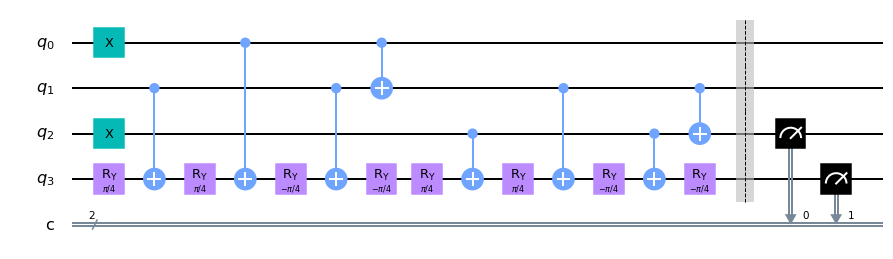

In [2]:
#execute the circuit by qasm_simulator
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
count = result.get_counts()
print(count)
qc.draw(output='mpl')